<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Curve-fitting IPCC
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description

#### References
- Provided in report

#### Packages

In [1]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy as sp
#import scipy.signal as signal
#import datetime as dt
import hvec_stat.general_fit as gf
#import hvec_stat.gof as gof
import hvec_stat.support as sup
import models as mdl
import sigfig as sf

In [2]:
# Settings
plt.rcParams['axes.grid'] = True
figsize = (20, 18)

#### Connect databases and import data

##### Data IPCC

In [3]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'IPCC.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [4]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,data,data,2,"CREATE TABLE ""data"" (\n""psmsl_id"" INTEGER,\n ..."
1,table,log,log,16856,"CREATE TABLE ""log"" (\n""name"" TEXT,\n ""downloa..."


In [5]:
sql = 'PRAGMA table_info(data)'
pd.read_sql(sql, cnxn)

,cid,name,type,notnull,dflt_value,pk
0,0,psmsl_id,INTEGER,0,None,0
1,1,process,TEXT,0,None,0
2,2,confidence,TEXT,0,None,0
3,3,scenario,TEXT,0,None,0
4,4,year,INTEGER,0,None,0
5,5,median,REAL,0,None,0
6,6,90%_low,REAL,0,None,0
7,7,90%_high,REAL,0,None,0
8,8,sigma,REAL,0,None,0
9,9,name,TEXT,0,None,0


In [6]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT name, scenario, year, median, confidence "
    "FROM data "
    "WHERE name IN ('DELFZIJL', 'HARLINGEN', "
    "'DEN HELDER', 'IJMUIDEN',  "
    "'HOEK VAN HOLLAND', 'VLISSINGEN') "
    "AND (process == 'total') "
    #"AND scenario IN ('ssp126', 'ssp245') "
    "AND (confidence == 'medium') "
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [7]:
cnxn.close()

In [8]:
res = pd.DataFrame()

In [9]:
res = df.groupby(['name', 'scenario']).apply(
    lambda x: pd.Series(sp.optimize.curve_fit(
        f = mdl.model6, xdata = x['year'] - 2005, ydata = x['median'])[0]))

res.columns = ['rate', 'acceieration', 'jerk']

In [10]:
res

rate  acceieration          jerk
name             scenario                                      
DELFZIJL         ssp119    0.004909 -3.874169e-06  7.092635e-10
                 ssp126    0.005224  1.651831e-06 -3.949852e-08
                 ssp245    0.004576  2.669475e-05 -9.403678e-08
                 ssp370    0.003815  4.881796e-05 -1.429802e-07
                 ssp585    0.003034  7.914197e-05 -2.560029e-07
DEN HELDER       ssp119    0.004354 -6.808978e-07 -1.384807e-08
                 ssp126    0.004798  3.554473e-06 -4.666213e-08
                 ssp245    0.004177  2.763785e-05 -9.895128e-08
                 ssp370    0.003450  4.910982e-05 -1.440935e-07
                 ssp585    0.002571  8.125062e-05 -2.658100e-07
HARLINGEN        ssp119    0.004379 -1.340881e-06 -1.087445e-08
                 ssp126    0.004804  2.908022e-06 -4.455751e-08
                 ssp245    0.004165  2.737757e-05 -9.849098e-08
                 ssp370    0.003438  4.876036e-05 -1.429497e-07
                 ssp585    0.002603  7.990168e-05 -2.603319e-07
HOEK VAN HOLLAND ssp119    0.005222 -7.851077e-07 -1.637314e-08
                 ssp126    0.005588  3.919657e-06 -4.728496e-08
                 ssp245    0.004931  2.873555e-05 -1.029876e-07
                 ssp370    0.004186  5.010687e-05 -1.465766e-07
                 ssp585    0.003366  8.113726e-05 -2.629093e-07
IJMUIDEN         ssp119    0.004625 -1.721067e-06 -1.068575e-08
                 ssp126    0.005012  2.806655e-06 -4.343458e-08
                 ssp245    0.004327  2.818211e-05 -1.006350e-07
                 ssp370    0.003581  4.978959e-05 -1.462657e-07
                 ssp585    0.002788  8.031066e-05 -2.604965e-07
VLISSINGEN       ssp119    0.004402 -9.012709e-07 -1.424188e-08
                 ssp126    0.004781  4.448414e-06 -4.973670e-08
                 ssp245    0.004133  2.906906e-05 -1.032292e-07
                 ssp370    0.003412  5.023121e-05 -1.465153e-07
                 ssp585    0.002572  8.157099e-05 -2.638288e-07

In [11]:
names = res.reset_index()['name'].unique()
scenarios = res.reset_index()['scenario'].unique()

In [12]:
df.set_index(keys = ['name', 'scenario'], inplace = True)

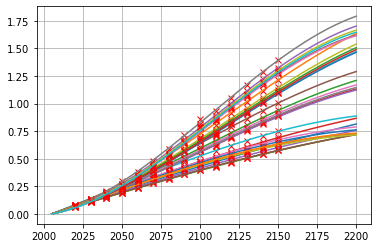

In [15]:
x = np.linspace(2005, 2200, 1000)
for sc in scenarios:
    for nm in names:
        data = df.loc[nm].loc[sc]
        a, b, c = (res.loc[nm].loc[sc])
        plt.plot(data['year'], data['median'], 'rx')
        plt.plot(x, mdl.model6(x - 2005, a, b, c))

In [14]:
res.reset_index().to_excel(r'../data/ipcc_scen.xlsx', index = False)

#### End script
Prepared by HVEC lab, 2022